# Tests and Exercises

url: https://pulser.readthedocs.io/en/stable/intro_rydberg_blockade.html

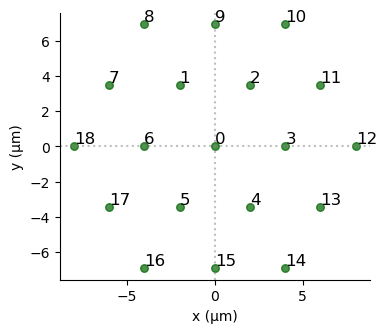

In [4]:
import numpy as np

from pulser import Register, Pulse, Sequence
from pulser.devices import Chadoq2
from pulser.waveforms import RampWaveform, BlackmanWaveform

layers = 2
reg = Register.hexagon(layers=layers)
reg.draw()

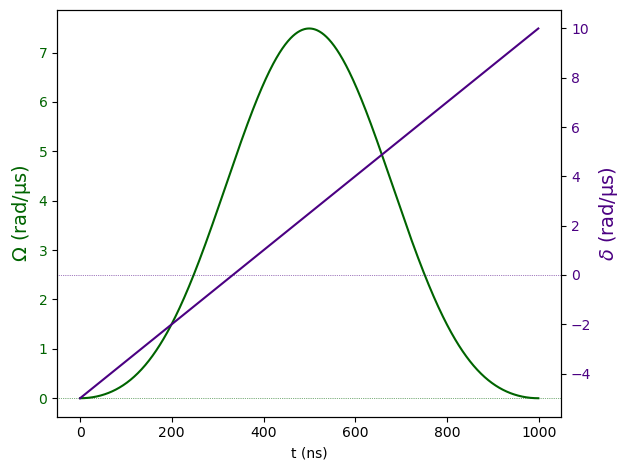

In [3]:
duration = 1000 # ~ 1 microsec
pulse = Pulse(BlackmanWaveform(duration, np.pi), RampWaveform(duration, -5.0, 10.0), 0)
pulse.draw()

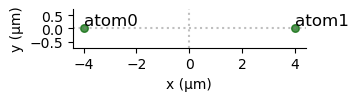

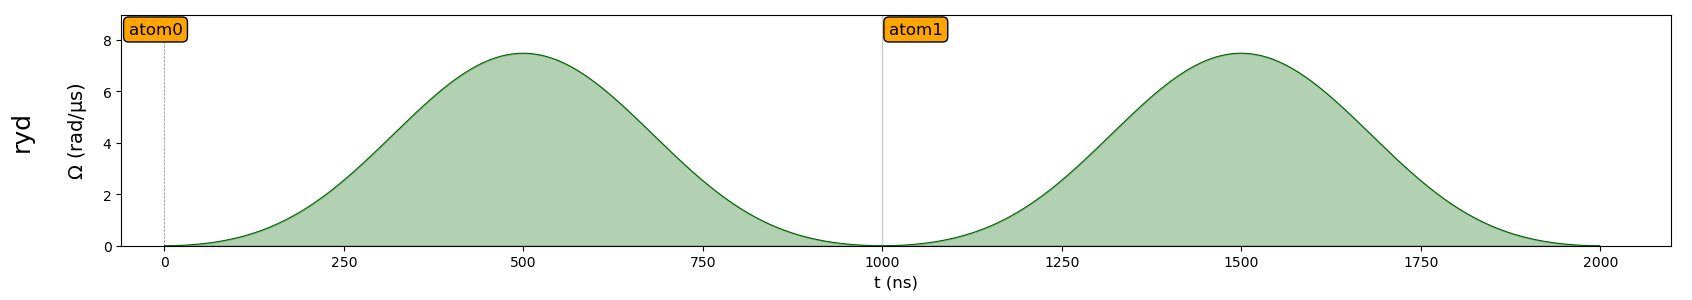

In [6]:
reg = Register.rectangle(1, 2, spacing=8, prefix="atom")
reg.draw()

pi_pulse = Pulse.ConstantDetuning(BlackmanWaveform(duration, np.pi), 0.0, 0.0)

seq = Sequence(reg, Chadoq2)

seq.declare_channel("ryd", "rydberg_local", "atom0")

seq.add(pi_pulse, "ryd")
seq.target("atom1", "ryd")
seq.add(pi_pulse, "ryd")

seq.draw()

In [7]:
import matplotlib.pyplot as plt
from pulser_simulation import Simulation

data = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>
rr = np.kron(r, r)  # |rr>
occup = [np.outer(rr, np.conj(rr))]  # |rr><rr|

for i, R in enumerate(distances):
    # Atom Register and Device
    reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

    # Pulse Sequence
    seq = Sequence(reg, Chadoq2)
    seq.declare_channel("ryd", "rydberg_local", "atom0")
    seq.add(pi_pulse, "ryd")
    seq.target("atom1", "ryd")
    seq.add(pi_pulse, "ryd")

    sim = Simulation(seq)

    res = sim.run()  # Returns a SimulationResults instance
    data.append(
        res.expect(occup)[0]
    )  # Get expectation value for the occupation operator
print("...Simulation Complete!")

...Simulation Complete!


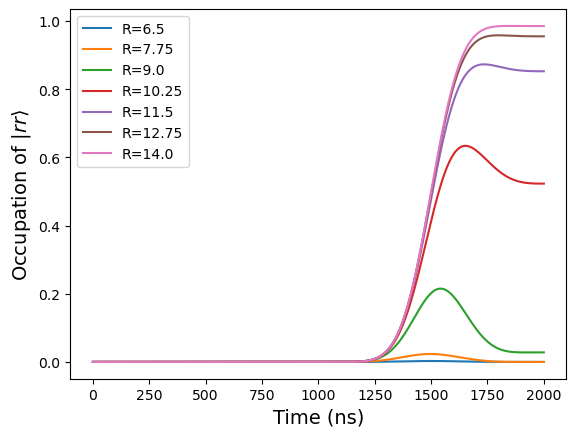

In [8]:
for i, R in enumerate(distances):
    plt.plot(data[i], label=f"R={R}")
    plt.xlabel("Time (ns)", fontsize=14)
    plt.ylabel(r"Occupation of $|rr\rangle$", fontsize=14)
    plt.legend()

In [9]:
L=3
square = np.array([[i, j] for i in range(L) for j in range(L)], dtype=float)
square -= np.mean(square, axis=0)
square *= 5

In [10]:
square

array([[-5., -5.],
       [-5.,  0.],
       [-5.,  5.],
       [ 0., -5.],
       [ 0.,  0.],
       [ 0.,  5.],
       [ 5., -5.],
       [ 5.,  0.],
       [ 5.,  5.]])